# Titanic - Kaggle - 07252016

###### Kaggle Competition - Beginner - Source - Kaggle.com

###### Dataset : train.csv and test.csv

In [272]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [273]:
# Read in training dataset
df=pd.read_csv('train.csv')

In [274]:
# View first 5 rows of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [275]:
#View info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [276]:
#Describe data
df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature Analysis and Preparation for Model 

In [277]:
# Recoding male and female to 0 and 1

df['Recode_Sex']=df['Sex'].map( {'female' : 1, 'male':0}).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [278]:
# Explore Age
df[df['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,0


In [279]:
# Make a copy of Age field
df['AgeCopy']=df['Age']

df.head()

# Setup an array to calculate and store median ages for combination of Sex and PClass segments
median_ages=np.zeros((2,3))
median_ages

# Calculate median age for i=0/1(male/female)&j=0/1/2(Pclass:1,2,3)
for i in range(0,2):
    for j in range (0,3):
        median_ages[i,j] = df[(df['Recode_Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
        
median_ages

#Review current datapoints with Age as null
df[df['Age'].isnull()].head()

# Replace null with median age in AgeCopy for all Age that is Nan
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Recode_Sex == i) & (df.Pclass == j+1),'AgeCopy'] = median_ages[i,j]
        
        # Reprint to check if it worked. Note AgeCopy has values and Age has NaN
df[df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex,AgeCopy
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,25.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,30.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,21.5
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,25.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,21.5


In [280]:
# Make a copy of Age field
df['AgeCopy']=df['Age']

In [281]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex,AgeCopy
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0


In [282]:
# Setup an array to calculate and store median ages for combination of Sex and PClass segments
median_ages=np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [283]:
# Calculate median age for i=0/1(male/female)&j=0/1/2(Pclass:1,2,3)
for i in range(0,2):
    for j in range (0,3):
        median_ages[i,j] = df[(df['Recode_Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()

In [284]:
median_ages

array([[ 40. ,  30. ,  25. ],
       [ 35. ,  28. ,  21.5]])

In [285]:
#Review current datapoints with Age as null
df[df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex,AgeCopy
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,NaN


In [286]:
# Replace null with median age in AgeCopy for all Age that is Nan
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Recode_Sex == i) & (df.Pclass == j+1),'AgeCopy'] = median_ages[i,j]

In [287]:
# Reprint to check if it worked. Note AgeCopy has values and Age has NaN
df[df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex,AgeCopy
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,25.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,30.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,21.5
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,25.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,21.5


In [288]:
# Investe field Embarked
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [289]:
# Recode Embarked to 0,1,2

###### Visualization


1) Plot Pclass against survived to see relationship

2) Plot Sex against survived to see relationship

3) Plot Age against survived to see relationship

4) Plot embarked against survived


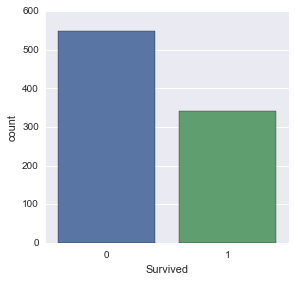

In [290]:
#Visualize target variable
sns.factorplot(x="Survived",data=df,kind="count")

In [291]:
# Fewer people survived in the disaster

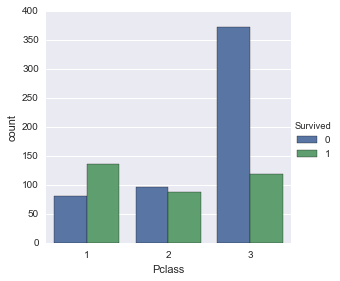

In [292]:
#1) Plot Pclass against survived to see relationship
sns.factorplot(x="Pclass",data=df,kind="count",hue="Survived")

In [293]:
#Pclass 1 had the highest survival rate
#Pclass 1 had more number of survivors than non survivors.
#Other classes had a higher number of non survivors
#Clearly there is a relationship between Pclass and Survived

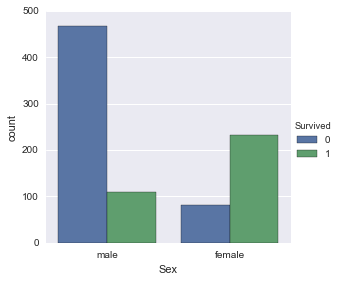

In [294]:
#2) Plot Sex against survived to see relationship
sns.factorplot(x="Sex",data=df,hue="Survived",kind="count")

In [295]:
# Clearly a high percentage of females survived than males

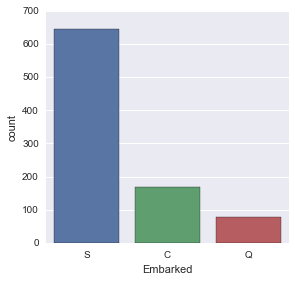

In [296]:
#4) Plot embarked against survived
sns.factorplot(x="Embarked",data=df,kind="count")

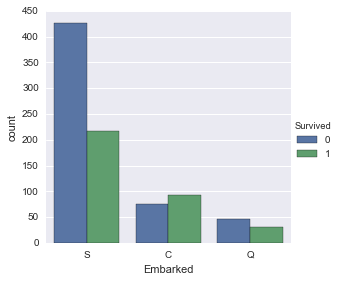

In [297]:
sns.factorplot(x="Embarked",data=df,hue="Survived",kind="count")

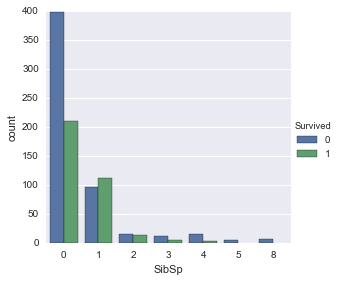

In [298]:
#Plot Survived against SibSp

sns.factorplot(x="SibSp",data=df,hue="Survived",kind="count")

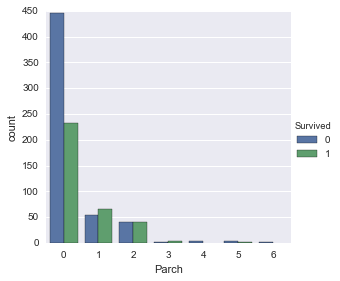

In [299]:
#Plot Survived against Parch
sns.factorplot(x="Parch",data=df,hue="Survived",kind="count")

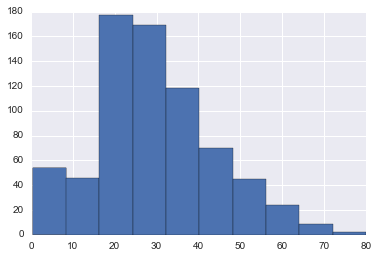

In [300]:
df['Age'].hist()

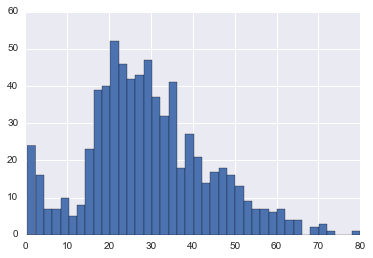

In [301]:
df['Age'].hist(bins=40)

#### Model 1 - Logistic regression - Features - Pclass, AgeCopy, Recode_Sex, SibSp, Parch

In [302]:
from sklearn.linear_model import LogisticRegression

In [303]:
X=df[['Pclass','Recode_Sex','AgeCopy','SibSp','Parch']]
y=df['Survived']
lr=LogisticRegression()
logisticreg=lr.fit(X,y)

#### Test Dataset - Data Cleaning

In [304]:
test_df=pd.read_csv('test.csv')

In [305]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [306]:
test_df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.409091,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.492255,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,1.000000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [307]:
# Recoding male and female to 0 and 1

test_df['Recode_Sex']=test_df['Sex'].map( {'female' : 1, 'male':0}).astype(int)
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [308]:
# Explore Age
test_df[test_df['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,0
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,1
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,0
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,1
39,931,0,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S,0
41,933,0,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S,0
47,939,0,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q,0
54,946,0,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C,0
58,950,0,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S,0


In [309]:
# Make a copy of Age field
test_df['AgeCopy']=test_df['Age']

In [310]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex,AgeCopy
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,34.5
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,22.0


In [311]:
# Setup an array to calculate and store median ages for combination of Sex and PClass segments
median_ages=np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [312]:
# Calculate median age for i=0/1(male/female)&j=0/1/2(Pclass:1,2,3)
for i in range(0,2):
    for j in range (0,3):
        median_ages[i,j] = test_df[(test_df['Recode_Sex'] == i) & (test_df['Pclass'] == j+1)]['Age'].dropna().median()

In [313]:
median_ages

array([[ 42.,  28.,  24.],
       [ 41.,  24.,  22.]])

In [316]:
#Review current datapoints with Age as null
test_df[test_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex,AgeCopy
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,0,NaN
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,1,NaN
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,0,NaN
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,NaN
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,1,NaN


In [317]:
# Replace null with median age in AgeCopy for all Age that is Nan
for i in range(0, 2):
    for j in range(0, 3):
        test_df.loc[ (test_df.Age.isnull()) & (test_df.Recode_Sex == i) & (test_df.Pclass == j+1),'AgeCopy'] = median_ages[i,j]

In [318]:
# Reprint to check if it worked. Note AgeCopy has values and Age has NaN
test_df[test_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex,AgeCopy
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,0,24.0
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,1,41.0
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,0,24.0
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,22.0
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,1,22.0


In [320]:
X_test=test_df[['Pclass','Recode_Sex','AgeCopy','SibSp','Parch']]
y=test_df['Survived']

In [323]:
y_pred=lr.predict(X_test)

In [91]:
print(y_pred)

[1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0
 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1]


In [324]:
test_df['Survived']=y_pred

In [325]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Recode_Sex,AgeCopy
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,34.5
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,22.0


In [326]:
submitlogisticmodel=test_df[['PassengerId','Survived']]

In [327]:
submitlogisticmodel.to_csv("submitlogisticregres1.csv", index=False)

### Model Scored 0.74641 which is not an improvement over Rudimentary Model 1 - Women and Children Survive